In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

closed_deals = pd.read_csv('olist_closed_deals_dataset.csv', parse_dates=['won_date'])
qualified_leads = pd.read_csv('olist_marketing_qualified_leads_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')



In [2]:
len(closed_deals)

842

In [3]:
len(qualified_leads)

8000

In [4]:
closed_deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   mql_id                         842 non-null    object        
 1   seller_id                      842 non-null    object        
 2   sdr_id                         842 non-null    object        
 3   sr_id                          842 non-null    object        
 4   won_date                       842 non-null    datetime64[ns]
 5   business_segment               841 non-null    object        
 6   lead_type                      836 non-null    object        
 7   lead_behaviour_profile         665 non-null    object        
 8   has_company                    63 non-null     object        
 9   has_gtin                       64 non-null     object        
 10  average_stock                  66 non-null     object        
 11  business_type      

In [5]:
#NaN's are leads that did not close a deal 
marketing_funnel = qualified_leads.merge(closed_deals, on='mql_id', how='left')

In [6]:
marketing_funnel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   mql_id                         8000 non-null   object        
 1   first_contact_date             8000 non-null   object        
 2   landing_page_id                8000 non-null   object        
 3   origin                         7940 non-null   object        
 4   seller_id                      842 non-null    object        
 5   sdr_id                         842 non-null    object        
 6   sr_id                          842 non-null    object        
 7   won_date                       842 non-null    datetime64[ns]
 8   business_segment               841 non-null    object        
 9   lead_type                      836 non-null    object        
 10  lead_behaviour_profile         665 non-null    object        
 11  has_company      

In [7]:
marketing_funnel['average_stock'].value_counts()

5-20       22
50-200     15
1-5        10
20-50       8
200+        7
unknown     4
Name: average_stock, dtype: int64

mql_id : Marketing Qualified Lead ID                  
first_contact_date : ..                      
landing_page_id : landing page id where lead was acquired                       
origin : Type of Media where the lead was acquired            
seller_id : ..                                
sdr_id : Sales Development Representative ID               
sr_id : Sales Rep ID             
won_date : Date Deal was Closed            
business_segment : Sector of the market           
lead_type : size of company based on lead              
lead_behaviour_profile : an animal description describing the lead       
has_company : does the lead have a company?           
has_gtin : does the company have a global trade item number barcode?       
average_stock : lead declared average stock       
business_type : ..         
declared_product_catalog_size : ..            
declared_monthly_revenue : .. 

In [8]:
#we can see that only around 800 deals were closed 8000 - 7158 (roughly)
marketing_funnel.isnull().sum()

mql_id                              0
first_contact_date                  0
landing_page_id                     0
origin                             60
seller_id                        7158
sdr_id                           7158
sr_id                            7158
won_date                         7158
business_segment                 7159
lead_type                        7164
lead_behaviour_profile           7335
has_company                      7937
has_gtin                         7936
average_stock                    7934
business_type                    7168
declared_product_catalog_size    7931
declared_monthly_revenue         7158
dtype: int64

In [9]:
numerical = ['mql_id', 
             'first_contact_date',
             'landing_page_id',
             'seller_id',
             'sdr_id',
             'sr_id',
             'won_date',
             'declared_product_catalog_size',
             'declared_monthly_revenue']

In [10]:
categorical = ['origin',
               'business_segment',
               'lead_type',
               'lead_behaviour_profile',
               'business_type']

In [11]:
funnel_data = marketing_funnel[numerical + categorical]

In [12]:
non_zero_revenue = funnel_data[(funnel_data['declared_monthly_revenue'].notnull()) & (funnel_data['declared_monthly_revenue'].values != 0)]

In [13]:
real_type = funnel_data[funnel_data['business_type'].notnull()]

In [14]:
business_type_sum = real_type.groupby("business_type")['mql_id'].count()

In [15]:
business_type_sum['manufacturer']

242

<AxesSubplot:xlabel='business_type'>

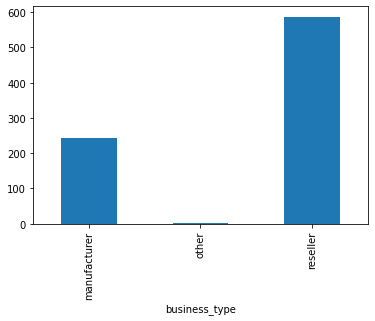

In [16]:
business_type_sum.plot(kind='bar')

In [17]:
#only 45 companies reported revenue in this dataset! not a lot to work with
len(non_zero_revenue)

45

In [18]:
funnel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   mql_id                         8000 non-null   object        
 1   first_contact_date             8000 non-null   object        
 2   landing_page_id                8000 non-null   object        
 3   seller_id                      842 non-null    object        
 4   sdr_id                         842 non-null    object        
 5   sr_id                          842 non-null    object        
 6   won_date                       842 non-null    datetime64[ns]
 7   declared_product_catalog_size  69 non-null     float64       
 8   declared_monthly_revenue       842 non-null    float64       
 9   origin                         7940 non-null   object        
 10  business_segment               841 non-null    object        
 11  lead_type        

In [19]:
#to get seller locations
marketing_sales = marketing_funnel.merge(sellers, on='seller_id', how='left')

In [20]:
marketing_items = marketing_funnel.merge(items,on='seller_id', how='left')

In [21]:
marketing_items.head()

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,...,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,...,NaN,reseller,NaN,0.0,1efcc6ba75b519535a510c53153a9256,1.0,e94df75b2e9a8b056be0c144a731f55c,2018-06-26 22:20:21,94.2,18.76


At this point I realized that while the data could be relevent to a business there is not enough quality data here for building quality models. 

In [22]:
len(sellers)

3095

In [33]:
funnel_data['seller_id_bool'] = funnel_data['seller_id'].notna()

In [28]:
funnel_data['first_contact_date'][0]

'2018-02-01'

In [30]:
def trim_col(string):
    cut_string = ''
    for i in range(len(string) - 3):
        cut_string = cut_string + string[i]
    return cut_string
        

In [31]:
funnel_data['first_contact_y_m'] = funnel_data['first_contact_date'].apply(trim_col)

<ipython-input-31-a120f48789ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  funnel_data['first_contact_y_m'] = funnel_data['first_contact_date'].apply(trim_col)


In [34]:
monthly_closed = funnel_data.groupby('first_contact_y_m')['seller_id_bool'].sum()
monthly_closed.to_frame().T

first_contact_y_m,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
seller_id_bool,0,2,9,7,14,18,11,152,149,167,183,130


<AxesSubplot:xlabel='first_contact_y_m'>

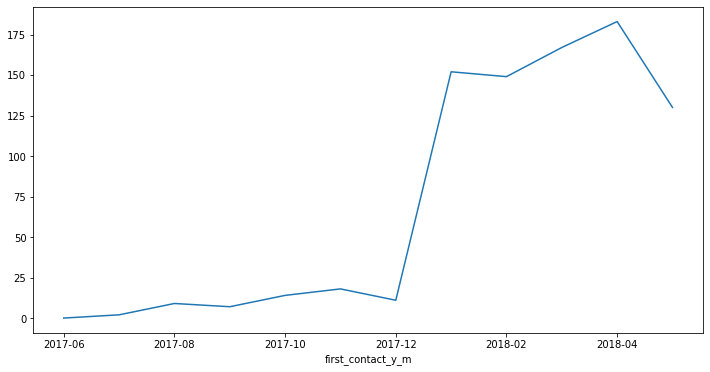

In [41]:
monthly_closed.plot.line(figsize=(12, 6))
